<a href="https://colab.research.google.com/github/GEMajlis/sklearn_models/blob/main/powerConsumptionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


gonzalomajlis

874446b4701da0dfda59592739a92619

In [1]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ruchikakumbhar/power-consumption-prediction-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gonzalomajlis
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ruchikakumbhar/power-consumption-prediction-dataset


100%|██████████| 1.36M/1.36M [00:00<00:00, 32.4MB/s]

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import math
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('/content/power-consumption-prediction-dataset/power consumption.csv')

In [4]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime               52416 non-null  object 
 1   Temperature            52416 non-null  float64
 2   Humidity               52416 non-null  float64
 3   Wind Speed             52416 non-null  float64
 4   general diffuse flows  52416 non-null  float64
 5   diffuse flows          52416 non-null  float64
 6   Zone 1                 52416 non-null  float64
 7   Zone 2                 52416 non-null  float64
 8   Zone 3                 52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
df = df.drop(columns=['DateTime'])

In [7]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1', 'Zone 2  ', 'Zone 3  '],
      dtype='object')

In [8]:
df = df.rename(columns={'Wind Speed': 'wind_speed ', 'general diffuse flows': 'general_diffuse_flows', 'diffuse flows':'diffuse_flows', 'Zone 1':'zone_1', 'Zone 2  ':'zone_2', 'Zone 3  ':'zone_3'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature            52416 non-null  float64
 1   Humidity               52416 non-null  float64
 2   wind_speed             52416 non-null  float64
 3   general_diffuse_flows  52416 non-null  float64
 4   diffuse_flows          52416 non-null  float64
 5   zone_1                 52416 non-null  float64
 6   zone_2                 52416 non-null  float64
 7   zone_3                 52416 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB


In [10]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
wind_speed,0
general_diffuse_flows,0
diffuse_flows,0
zone_1,0
zone_2,0
zone_3,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,52416.0,18.810024,5.815476,3.247000,14.410000,18.780000,22.890000,40.01000
Humidity,52416.0,68.259518,15.551177,11.340000,58.310000,69.860000,81.400000,94.80000
wind_speed,52416.0,1.959489,2.348862,0.050000,0.078000,0.086000,4.915000,6.48300
general_diffuse_flows,52416.0,182.696614,264.400960,0.004000,0.062000,5.035500,319.600000,1163.00000
diffuse_flows,52416.0,75.028022,124.210949,0.011000,0.122000,4.456000,101.000000,936.00000
zone_1,52416.0,32344.970564,7130.562564,13895.696200,26310.668692,32265.920340,37309.018185,52204.39512
zone_2,52416.0,21042.509082,5201.465892,8560.081466,16980.766032,20823.168405,24713.717520,37408.86076
zone_3,52416.0,17835.406218,6622.165099,5935.174070,13129.326630,16415.117470,21624.100420,47598.32636


In [12]:
sns.set_theme(style="darkgrid")

Text(0, 0.5, 'temperture')

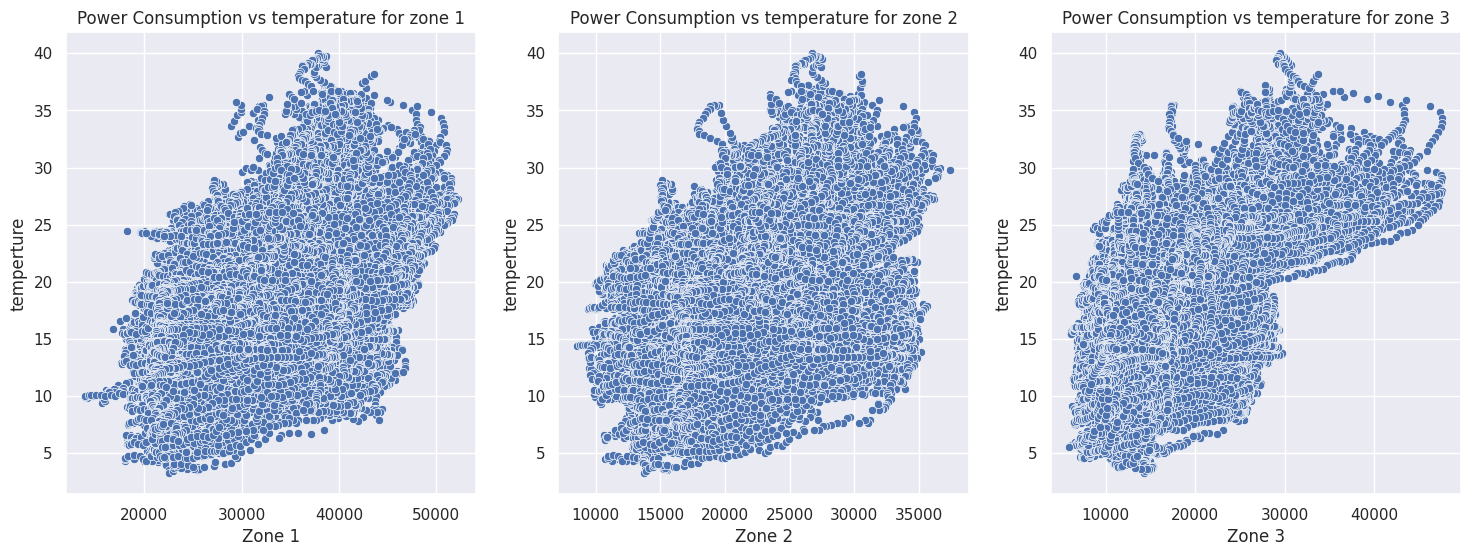

In [13]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='zone_1', y='Temperature')
plt.title('Power Consumption vs temperature for zone 1')
plt.xlabel('Zone 1')
plt.ylabel('temperture')

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='zone_2', y='Temperature')
plt.title('Power Consumption vs temperature for zone 2')
plt.xlabel('Zone 2')
plt.ylabel('temperture')

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='zone_3', y='Temperature')
plt.title('Power Consumption vs temperature for zone 3')
plt.xlabel('Zone 3')
plt.ylabel('temperture')

Text(0, 0.5, 'Humedity')

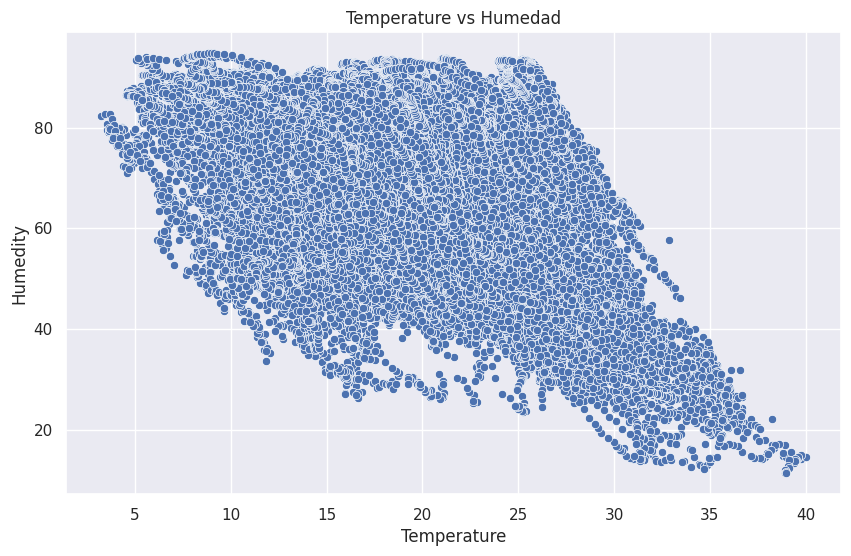

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Humidity')
plt.title('Temperature vs Humedad')
plt.xlabel('Temperature')
plt.ylabel('Humedity')


In [15]:
X = df.drop(columns=['zone_1', 'zone_2', 'zone_3'])
y1 = df['zone_1']
y2 = df['zone_2']
y3 = df['zone_3']

ZONE 1 with SGDRegressor

In [16]:
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X, y1, test_size=0.2, random_state=42)

In [17]:
model1 = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
model1.fit(X_train_one, y_train_one)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [36]:
prediction1 = model1.predict(X_test_one)
r2_one = r2_score(y_test_one, prediction1)
print('R2 for Zone 1:', r2_one)
print('MEA for Zone 1:', mean_absolute_error(y_test_one, prediction1))

R2 for Zone 1: 0.21066177238787331
MEA for Zone 1: 5180.341266162554


Zone 2 with linear regression

In [19]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y2, test_size=0.2, random_state=42)

In [20]:
model2 = LinearRegression()
model2.fit(X_train_two, y_train_two)

LinearRegression()

In [37]:
prediction2 = model2.predict(X_test_two)
r2_two = r2_score(y_test_two, prediction2)
print('R2 for Zone 2:', r2_one)
print('MEA for Zone 2:', mean_absolute_error(y_test_two, prediction2))

R2 for Zone 2: 0.21066177238787331
MEA for Zone 2: 3805.4789403633545


Zone 3 with XGBRegressor

In [22]:
X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X, y3, test_size=0.2, random_state=42)

In [24]:
import xgboost as xgb

In [25]:
d_train = xgb.DMatrix(X_train_three, label=y_train_three)
d_test = xgb.DMatrix(X_test_three, label=y_test_three)

In [26]:
params = {
    'max_depth': 7,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

In [33]:
model3 = xgb.train(params, d_train, num_boost_round=1000)

In [38]:
prediction3 = model3.predict(d_test)
r2_three = r2_score(y_test_three, prediction3)
print('R2 for Zone 3:', r2_three)
print('MEA for Zone 3:', mean_absolute_error(y_test_three, prediction3))

R2 for Zone 3: 0.6827548285549474
MEA for Zone 3: 2676.043962414168
